# Task 1

In [1]:
# import dependencies

import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam, Nadam, RMSprop, SGD, Adagrad, Adadelta, Adamax
from keras.callbacks import Callback, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

# Preparing

In [2]:
# loading dataset
data = pd.read_csv('../datasets/train.csv')

In [3]:
# extracting labels
X_data = data.drop(['label'], axis=1)
Y_data = data['label']

In [4]:
# splitting data for train and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=2)

In [5]:
# normalizing data
X_train = X_train / 255.0
X_val = X_val / 255.0

Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)

In [6]:
# reshaping data
X_train = X_train.values.reshape(-1,28,28,1)
X_val = X_val.values.reshape(-1,28,28,1)

In [7]:
# defining callback which stops at 99% accuracy
class SuperAccurateStopper(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            self.model.stop_training = True

# Defining function for instantiating model

In [8]:
def instantiate_model(optimizer_metadata: str, optimizer, kernel_size_1, kernel_size_2, conv_layers = None, image_generator = None):
    model = Sequential()

    if conv_layers is None:
        conv_layers = [
            Conv2D(filters=8, kernel_size=kernel_size_1, padding='same', activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(filters=16, kernel_size=kernel_size_2, padding='same', activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
        ]

    for conv_layer in conv_layers:
        model.add(conv_layer)

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    callback = SuperAccurateStopper()

    history = None

    if image_generator:
        history = model.fit(image_generator.flow(X_train, Y_train, batch_size=256), validation_data=(X_val, Y_val), epochs=50, callbacks=[callback], verbose=0)
    else:
        history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=256, callbacks=[callback], verbose=0)

    plt.figure()
    plt.title(f"Model (optimizer={optimizer_metadata})")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.plot(history.history['accuracy'], color='green')
    plt.plot(history.history['val_accuracy'], color='red')
    plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
    plt.show()

2022-11-17 14:06:51.160777: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


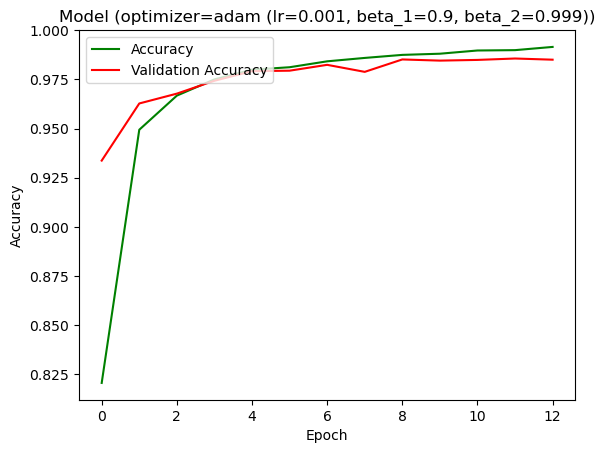

In [9]:
instantiate_model('adam (lr=0.001, beta_1=0.9, beta_2=0.999)',Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), kernel_size_1=(5, 5), kernel_size_2=(3, 3))

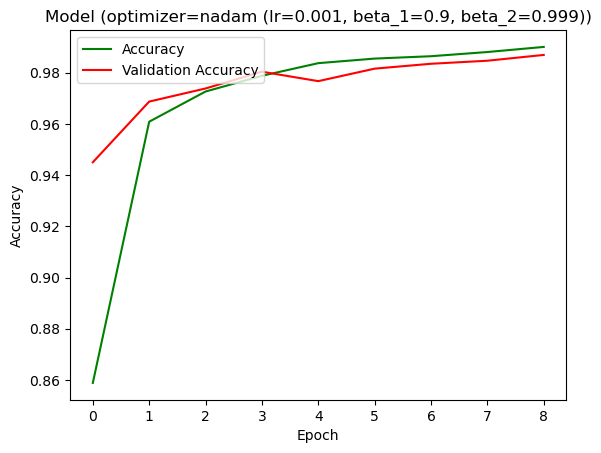

In [10]:
instantiate_model('nadam (lr=0.001, beta_1=0.9, beta_2=0.999)',Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), kernel_size_1=(5, 5), kernel_size_2=(3, 3))

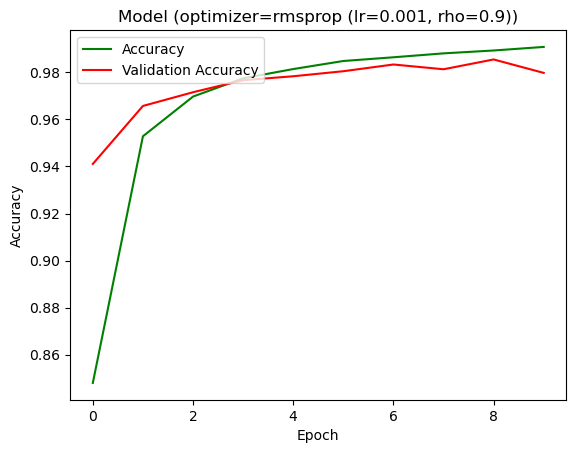

In [11]:
instantiate_model('rmsprop (lr=0.001, rho=0.9)',RMSprop(learning_rate=0.001, rho=0.9), kernel_size_1=(5, 5), kernel_size_2=(3, 3))

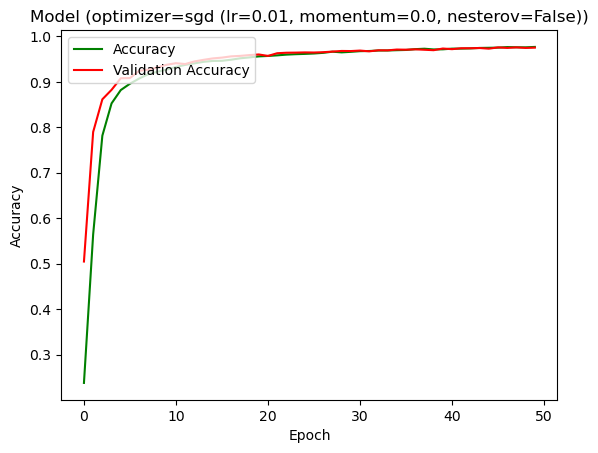

In [12]:
instantiate_model('sgd (lr=0.01, momentum=0.0, nesterov=False)',SGD(learning_rate=0.01, momentum=0.0, nesterov=False), kernel_size_1=(5, 5), kernel_size_2=(3, 3))

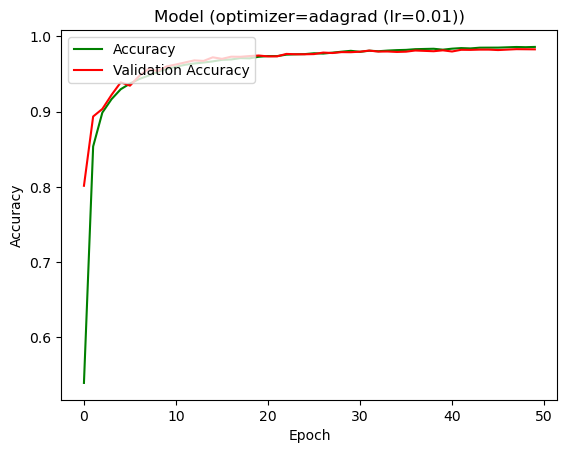

In [13]:
instantiate_model('adagrad (lr=0.01)',Adagrad(learning_rate=0.01), kernel_size_1=(5, 5), kernel_size_2=(3, 3))

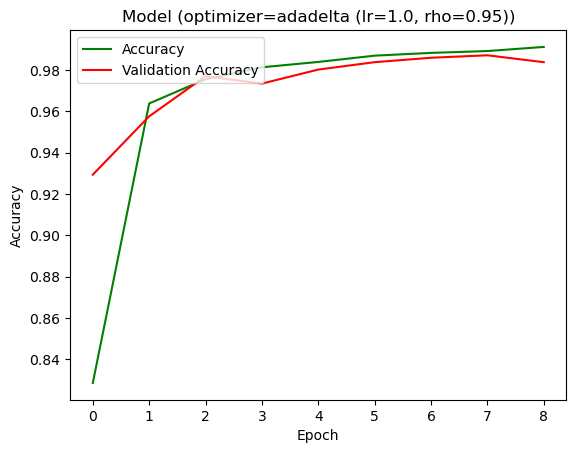

In [14]:
instantiate_model('adadelta (lr=1.0, rho=0.95)',Adadelta(learning_rate=1.0, rho=0.95), kernel_size_1=(5, 5), kernel_size_2=(3, 3))

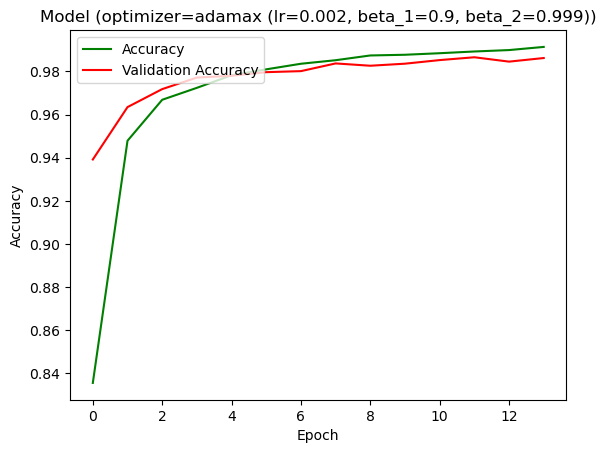

In [15]:
instantiate_model('adamax (lr=0.002, beta_1=0.9, beta_2=0.999)',Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999), kernel_size_1=(5, 5), kernel_size_2=(3, 3))

# Experimenting with the conv size

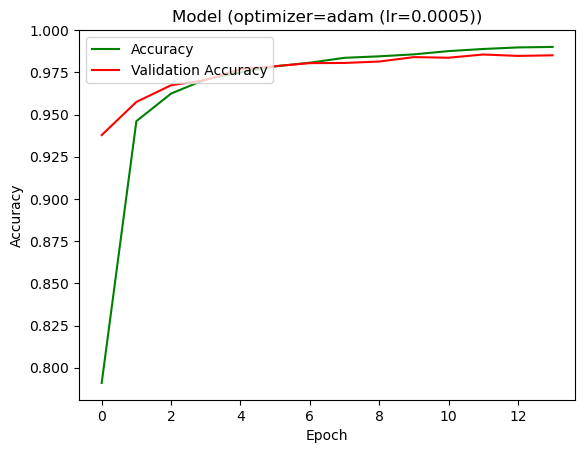

In [16]:
# (10, 10) (6, 6)
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(10, 10), kernel_size_2=(6, 6))

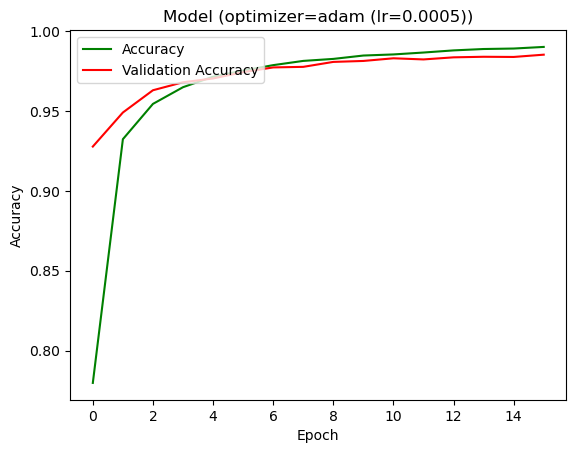

In [17]:
# (10, 5) (6, 3)
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(10, 5), kernel_size_2=(6, 3))

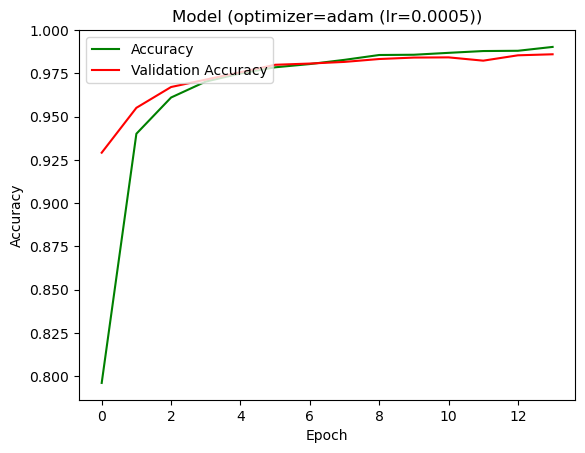

In [18]:
# (5, 10) (3, 6)
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(5, 10), kernel_size_2=(3, 6))

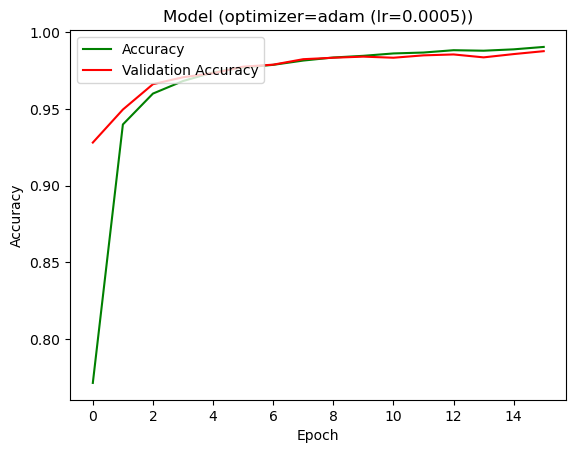

In [19]:
# (10, 5) (3, 6)
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(10, 5), kernel_size_2=(3, 6))

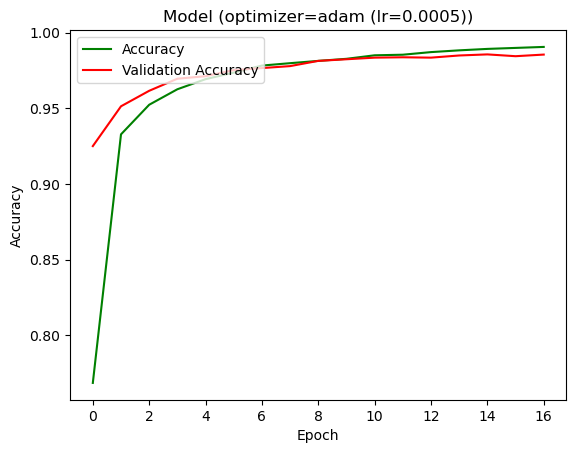

In [20]:
# (5, 10) (6, 3)
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(5, 10), kernel_size_2=(6, 3))

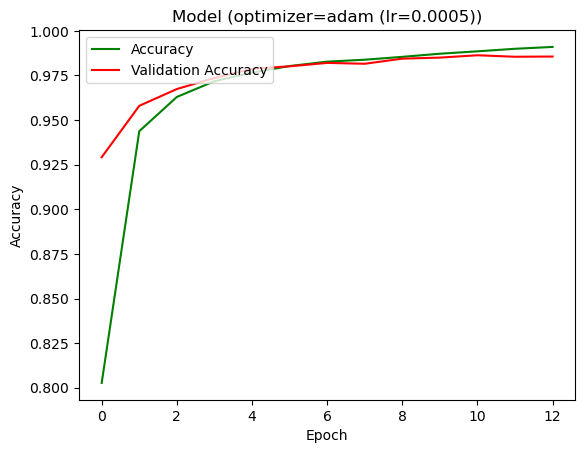

In [21]:
# (3, 6) (5, 10)
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10))

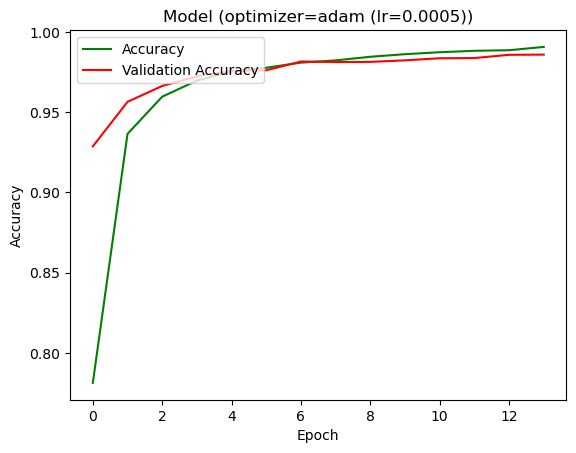

In [22]:
# (6, 3) (10, 15)
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(6, 3), kernel_size_2=(10, 5))

# Experimenting with the conv layers

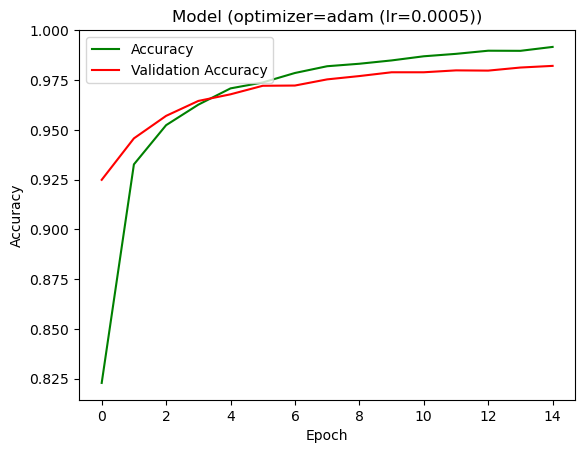

In [23]:
# one (3,3) conv layer
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
])

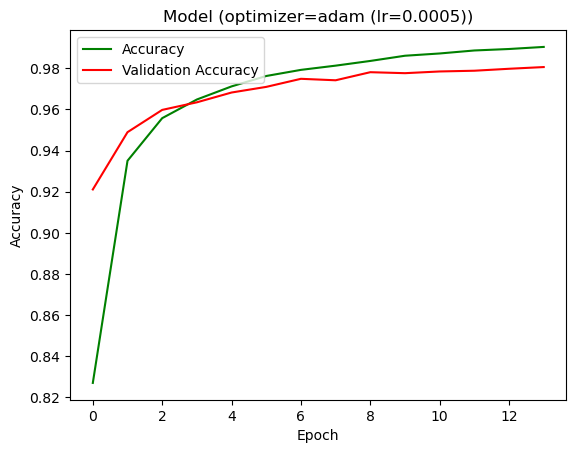

In [24]:
# one (3,6) conv layer
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
])

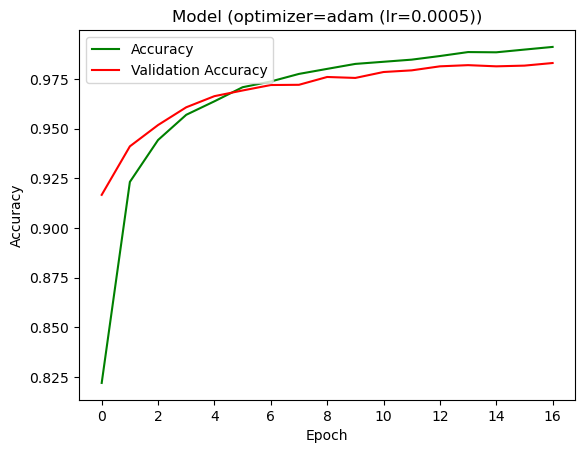

In [25]:
# one (6,3) conv layer
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(6, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
])

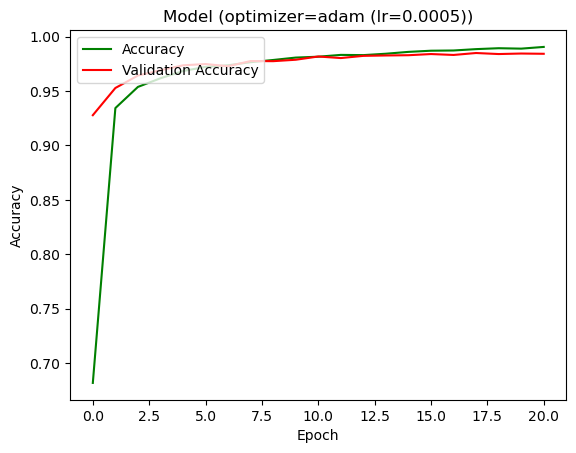

In [26]:
# additional (3,6) conv layer
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
  Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(filters=16, kernel_size=(5, 10), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
])

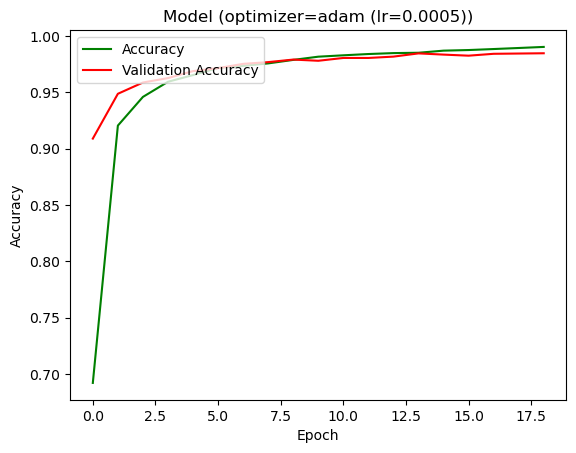

In [27]:
# additional (3,6) conv layer but second is vertical
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(10, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
])

In [ ]:
# four (3,6) conv layers
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
])

# Experimenting with the image generator

In [ ]:
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(10, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
], image_generator=ImageDataGenerator(
    rotation_range=0.05,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
))

In [ ]:
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(10, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
], image_generator=ImageDataGenerator(
    rotation_range=0.01,
    zoom_range=0.01,
    width_shift_range=0.01,
    height_shift_range=0.01,
))

In [ ]:
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(10, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
], image_generator=ImageDataGenerator(
    rotation_range=0.15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
))

In [ ]:
instantiate_model('adam (lr=0.0005)', Adam(learning_rate=0.0005), kernel_size_1=(3, 6), kernel_size_2=(5, 10), conv_layers = [
    Conv2D(filters=8, kernel_size=(3, 6), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(10, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 6), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
], image_generator=ImageDataGenerator(
    rotation_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
))